In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [55]:
sns.set_style('darkgrid')
import matplotlib
matplotlib.rcParams['figure.figsize']=(10,5)
matplotlib.rcParams['font.size'] = 12

In [10]:
df = pd.read_csv('./data/cwurData.csv')

In [12]:
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [13]:
# number of rows and columns available in dataset
df.shape

(2200, 14)

In [15]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [18]:
# checking the null values from the dataset
df.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [20]:
# checking the columns of the dataset
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [21]:
# checking the unique values available per columns

df.nunique()

world_rank              1000
institution             1024
country                   59
national_rank            229
quality_of_education     367
alumni_employment        565
quality_of_faculty       199
publications             987
influence                944
citations                135
broad_impact             343
patents                  738
score                    764
year                       4
dtype: int64

In [23]:
df.year.unique()

array([2012, 2013, 2014, 2015])

In [25]:
df.groupby('year').count()['institution']

year
2012     100
2013     100
2014    1000
2015    1000
Name: institution, dtype: int64

# Let's Work out on Year 2015 Data

In [31]:
df2015 = df[df.year == 2015].reset_index(drop=True)

In [33]:
df2015.head(2)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015
1,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015


### How many countries participated in the Survey?

In [34]:
df2015.country.nunique()

59

In [44]:
top_countries = df2015.country.value_counts()[:10]
top_countries 

USA               229
China              83
Japan              74
United Kingdom     65
Germany            55
France             49
Italy              47
Spain              40
South Korea        36
Canada             33
Name: country, dtype: int64

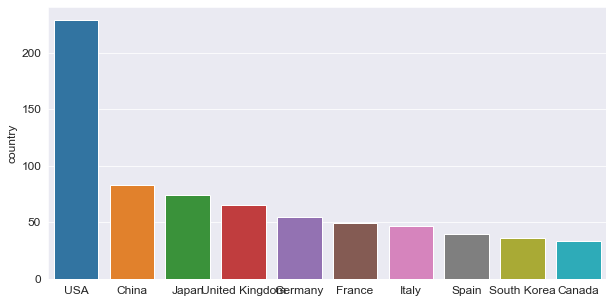

In [58]:
# Top 10 countries Participated in the survey
sns.barplot(top_countries.index,top_countries)
plt.show()

### Understanding Minimum, maximum and Average Score for all countries

In [75]:
score_df = df2015.score.agg([min,max,'mean']).round(2)
score_df

min      44.02
max     100.00
mean     46.86
Name: score, dtype: float64

In [84]:
print('Minimum score: {} '.format(score_df.values[0]))
print('Maximum score: {} '.format(score_df.values[1]))
print('Average score: {} '.format(score_df.values[2]))

Minimum score: 44.02 
Maximum score: 100.0 
Average score: 46.86 


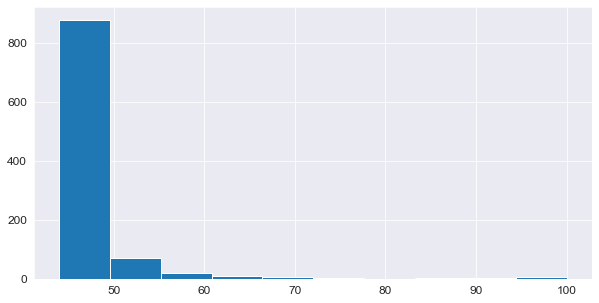

In [88]:
df2015.score.hist()
plt.show()

Note : it's found that many universities having the score in between 50-55, less number of institute having score greater than 70

### FInd out the institute having score greater than 70

In [94]:
df2015[df2015.score >= 70].count()['institution']

16

Note : Only 16 institutes having Score More than 70

### Top 10 countries with high Score

In [119]:
df2015.sort_values('score',ascending=False)[['country','institution','world_rank', 'score']][:10]

,country,institution,world_rank,score
0,USA,Harvard University,1,100.00
1,USA,Stanford University,2,98.66
2,USA,Massachusetts Institute of Technology,3,97.54
3,United Kingdom,University of Cambridge,4,96.81
4,United Kingdom,University of Oxford,5,96.46
5,USA,Columbia University,6,96.14
6,USA,"University of California, Berkeley",7,92.25
7,USA,University of Chicago,8,90.70
8,USA,Princeton University,9,89.42
9,USA,Cornell University,10,86.79


### Top 10 University ranking basis on Patents

In [120]:
df2015.sort_values('patents',ascending=True)[['country','institution','world_rank','patents','score']][:10]

,country,institution,world_rank,patents,score
2,USA,Massachusetts Institute of Technology,3,1,97.54
15,USA,Johns Hopkins University,16,2,71.60
0,USA,Harvard University,1,3,100.00
5,USA,Columbia University,6,4,96.14
59,USA,University of Florida,60,5,54.18
23,South Korea,Seoul National University,24,6,64.82
12,Japan,University of Tokyo,13,7,78.23
143,South Korea,Korea Advanced Institute of Science and Techno...,144,8,48.95
14,USA,"University of California, Los Angeles",15,9,76.91
1,USA,Stanford University,2,10,98.66


Note: As we see MIT is holding No 1 Rank in patent where as Haevard university is 3 but No 1 in World Rank. \
    Koria Advanced Institute is in top 10 ranking with 144 world rank

### Top 10 Institute in Alumni Employment

In [121]:
df2015.sort_values('alumni_employment',ascending=True)[["country",'institution','alumni_employment','world_rank','score']][:10]
                                                                                                                

,country,institution,alumni_employment,world_rank,score
0,USA,Harvard University,1,1,100.00
1,USA,Stanford University,2,2,98.66
12,Japan,University of Tokyo,3,13,78.23
13,USA,University of Pennsylvania,4,14,77.60
33,Japan,Keio University,5,34,59.84
5,USA,Columbia University,6,6,96.14
35,France,École Polytechnique,7,36,59.20
37,Japan,Waseda University,8,38,58.17
23,South Korea,Seoul National University,9,24,64.82
3,United Kingdom,University of Cambridge,10,4,96.81


Note - Harvard University is no 1 in Alumni Employment followed by Stanford University. 

### Top 10 institute in quality of Education

In [122]:
df2015.sort_values('quality_of_education',ascending=True)[["country",'institution','quality_of_education','world_rank','score']][:10]
                                                                                                                

,country,institution,quality_of_education,world_rank,score
0,USA,Harvard University,1,1,100.00
3,United Kingdom,University of Cambridge,2,4,96.81
2,USA,Massachusetts Institute of Technology,3,3,97.54
8,USA,Princeton University,4,9,89.42
6,USA,"University of California, Berkeley",5,7,92.25
11,USA,California Institute of Technology,6,12,84.40
4,United Kingdom,University of Oxford,7,5,96.46
36,France,École normale supérieure - Paris,8,37,58.80
1,USA,Stanford University,9,2,98.66
10,USA,Yale University,10,11,86.61


### Top 10 Institute in Quality of Faculty 

In [123]:
df2015.sort_values('quality_of_faculty',ascending=True)[["country",'institution','quality_of_faculty','world_rank','score']][:10]
                                                                                                                

,country,institution,quality_of_faculty,world_rank,score
0,USA,Harvard University,1,1,100.00
2,USA,Massachusetts Institute of Technology,2,3,97.54
8,USA,Princeton University,3,9,89.42
1,USA,Stanford University,4,2,98.66
3,United Kingdom,University of Cambridge,5,4,96.81
6,USA,"University of California, Berkeley",6,7,92.25
11,USA,California Institute of Technology,7,12,84.40
7,USA,University of Chicago,8,8,90.70
5,USA,Columbia University,9,6,96.14
4,United Kingdom,University of Oxford,10,5,96.46


## Look out the Score, rank and Institute participation from India

In [126]:
df_india = df2015[df2015.country == 'India']

In [127]:
df_india.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
340,341,Indian Institute of Technology Delhi,India,1,367,59,218,635,943,812,781.0,625,45.54,2015
378,379,University of Delhi,India,2,240,72,218,703,763,812,796.0,797,45.30,2015
447,448,Indian Institute of Science,India,3,367,332,218,315,537,511,447.0,239,44.96,2015
490,491,Panjab University,India,4,333,167,218,720,786,368,540.0,824,44.80,2015
533,534,Indian Institute of Technology Madras,India,5,367,147,218,523,943,812,796.0,317,44.68,2015


### How many Institute from India Participated in the survey?

In [132]:
print('Number of Institute Participated from India ::  {}'.format(df_india.institution.count()))

Number of Institute Participated from India ::  16


### Top 10 Indian Institutes having high Score value

In [137]:
df_india.sort_values('score',ascending=False)[["country",'institution','world_rank','score']][:10]
                                                                                                                

,country,institution,world_rank,score
340,India,Indian Institute of Technology Delhi,341,45.54
378,India,University of Delhi,379,45.30
447,India,Indian Institute of Science,448,44.96
490,India,Panjab University,491,44.80
533,India,Indian Institute of Technology Madras,534,44.68
595,India,Indian Institute of Technology Bombay,596,44.52
600,India,Tata Institute of Fundamental Research,601,44.51
613,India,Indian Institute of Technology Kharagpur,614,44.49
637,India,Indian Institute of Technology Roorkee,638,44.44
678,India,Banaras Hindu University,679,44.39


In [139]:
df_india

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
340,341,Indian Institute of Technology Delhi,India,1,367,59,218,635,943,812,781.0,625,45.54,2015
378,379,University of Delhi,India,2,240,72,218,703,763,812,796.0,797,45.30,2015
447,448,Indian Institute of Science,India,3,367,332,218,315,537,511,447.0,239,44.96,2015
490,491,Panjab University,India,4,333,167,218,720,786,368,540.0,824,44.80,2015
533,534,Indian Institute of Technology Madras,India,5,367,147,218,523,943,812,796.0,317,44.68,2015
595,596,Indian Institute of Technology Bombay,India,6,367,507,218,521,815,645,699.0,176,44.52,2015
600,601,Tata Institute of Fundamental Research,India,7,367,567,218,468,450,368,540.0,792,44.51,2015
613,614,Indian Institute of Technology Kharagpur,India,8,367,242,218,500,974,812,686.0,644,44.49,2015
637,638,Indian Institute of Technology Roorkee,India,9,367,395,218,839,931,428,565.0,871,44.44,2015
678,679,Banaras Hindu University,India,10,243,260,218,754,904,511,741.0,871,44.39,2015
